In [52]:
# working with the data and vizualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pre- processing
from sklearn.preprocessing import StandardScaler

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# evaluating
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# seed
RSEED = 10

In [10]:
clustering_df = pd.read_csv("../../ClusteringDocs/Concatenated-DF.csv")

In [12]:
clustering_df

,Unnamed: 0,bibliometr,analysi,explain,artifici,intellig,field,jose,alonso,ciro,...,statistikerstatistikerin,ausbilderausbilderin,richterrichterin,barkeeperbarkeeperin,fahrdienstleiterfahrdienstleiterin,auftragssachbearbeiterauftragssachbearbeiterin,sorter,postsortiererpostsortiererin,balance,Y-LABEL
0,0,0.0,0.076892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AlgorithmicFairness
1,1,0.0,0.076892,0.689831,0.408116,0.516352,0.331349,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ArtificialIntelligenceExplainability
2,2,0.0,0.000000,0.398812,0.408116,0.651563,0.331349,1.499155,4.020839,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ArtificialIntelligenceExplainability
3,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FilterBubble
4,4,0.0,0.000000,0.000000,0.000000,0.000000,0.331349,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GenderBias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.0,0.076892,0.316051,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FilterBubble
196,196,0.0,0.076892,0.199406,0.000000,0.000000,0.331349,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FilterBubble
197,197,0.0,0.000000,0.316051,0.000000,0.325782,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AlgorithmicFairness
198,198,0.0,0.121871,0.199406,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FilterBubble


<h2>Dimensions reduction</h2>
Due to the fact we have tousends of terms that represent a document vector.<br>
We would like to extract the important features from them and still preserve<br>
the varity and the trends in the data.<br>
Therefor we will perform a dimensions reduction using PCA.

In [13]:
cluster_features_df = clustering_df.iloc[:, :clustering_df.shape[1]-1]
cluster_categories_df = clustering_df.iloc[:, clustering_df.shape[1]-1:]

In [14]:
# lets choose the create 75 components
components = 75

pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(cluster_features_df)

PCA(n_components=75)

In [15]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[77.58965359  1.36403897  1.07476353  0.61979701  0.59317136  0.4690676
  0.43505063  0.42952768  0.3811652   0.34392033  0.3407414   0.33679366
  0.32324081  0.31725077  0.31195552  0.30134491  0.29381419  0.28355859
  0.27594881  0.25508068  0.24721507  0.24279309  0.22594969  0.21474745
  0.20536359  0.20320935  0.19728616  0.19351747  0.18693999  0.18362189
  0.1781573   0.17522827  0.17428274  0.16234858  0.16014917  0.15590572
  0.15165166  0.14877518  0.14609309  0.14054924  0.13752912  0.13530074
  0.1339493   0.13198335  0.1315919   0.1295906   0.12903795  0.12742773
  0.12600359  0.12412448  0.12351549  0.12245936  0.1216148   0.11854641
  0.11692166  0.11435936  0.11401689  0.11285629  0.111605    0.10855264
  0.10703446  0.10637968  0.10537723  0.1030932   0.10234788  0.10083573
  0.09931905  0.09762808  0.0974071   0.09570458  0.09504085  0.09394262
  0.0924046   0.09093602  0.09082667]



In [16]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[77.58965359 78.95369257 80.02845609 80.6482531  81.24142445 81.71049205
 82.14554269 82.57507037 82.95623557 83.3001559  83.64089729 83.97769095
 84.30093176 84.61818253 84.93013804 85.23148295 85.52529714 85.80885573
 86.08480454 86.33988523 86.5871003  86.82989338 87.05584308 87.27059052
 87.47595411 87.67916346 87.87644962 88.0699671  88.25690709 88.44052898
 88.61868628 88.79391455 88.96819729 89.13054587 89.29069504 89.44660076
 89.59825242 89.7470276  89.89312069 90.03366993 90.17119905 90.3064998
 90.4404491  90.57243244 90.70402434 90.83361495 90.96265289 91.09008062
 91.21608421 91.34020869 91.46372417 91.58618353 91.70779833 91.82634474
 91.9432664  92.05762576 92.17164265 92.28449894 92.39610394 92.50465658
 92.61169104 92.71807072 92.82344795 92.92654115 93.02888903 93.12972476
 93.22904382 93.3266719  93.424079   93.51978358 93.61482443 93.70876706
 93.80117165 93.89210767 93.98293434]



Text(0, 0.5, 'Explained variance (%)')

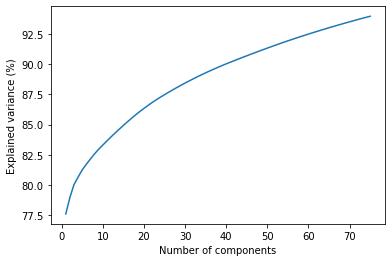

In [17]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [18]:
# extract 75 PC's from our x-features
X_pca = pca.transform(cluster_features_df)
print(X_pca.shape)

(200, 75)


As we can see we can preserve 93% of the varity in the dataset, using 75 principle components. We will use them as input for our Kmeans clustering algorithm.

<h2>Kmeans clustering</h2>

In [19]:
def elbow_met(df):

    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(df)
        kmeanModel.fit(df)
        distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Within groups sum of squares')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

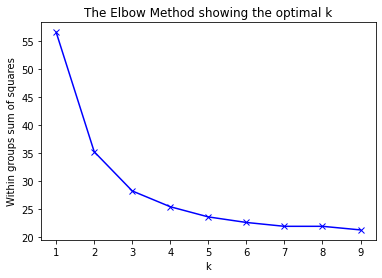

In [20]:
# performe kmeans elbow method
kmeans_df = pd.DataFrame(X_pca)
elbow_met(kmeans_df)

By using the elbow method we can see that the desired number of clusters is between 2 or 3, yet we were asked to create 4 clusers(as the number of documents categories due to the different queries results we took them from).

In [21]:
# performe kmeans with k=4
kmeans = KMeans(n_clusters=4, random_state=RSEED).fit(kmeans_df)

In [22]:
# add the kmeans cluster's labels to the dataset
labels = kmeans.predict(kmeans_df)
kmeans_df['cluster'] = labels
kmeans_df

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,cluster
0,99.644678,-2.281505,0.051183,1.996088,-0.012613,0.124773,-0.414911,2.435252,-3.473649,0.933681,...,-0.806512,-0.144803,-1.044098,-1.314007,0.875305,0.384381,-3.543929,0.017935,1.091102,3
1,98.496353,-3.210125,-1.019049,0.363771,-0.355784,-1.413011,-0.212271,1.136665,-1.543433,0.273489,...,-0.069627,-1.157648,1.597854,0.396092,2.389284,0.012542,0.405590,0.526443,-3.227797,3
2,97.432889,-3.851789,-1.560119,-0.074175,-1.188571,-1.392382,0.232930,0.238143,-1.318080,0.395753,...,-0.219527,-0.072435,0.115625,-0.540035,0.090979,-0.569359,-0.455885,-0.200147,-0.127740,3
3,96.508469,-1.913727,-1.212851,0.511817,-1.298109,0.490867,1.074186,0.391566,-1.857363,2.312409,...,-5.662419,6.249536,5.099191,4.060657,5.752342,5.810678,3.884327,1.251826,0.713736,3
4,95.440705,-3.492914,-1.599160,-0.018352,-1.903288,-0.621295,0.617642,0.475483,-0.191078,-0.093722,...,-0.332612,-0.206482,0.055031,-0.354976,-0.026836,-0.735896,0.131719,-0.128870,0.128761,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-95.564931,-0.264494,-0.371166,-2.138944,-1.728594,0.754169,-0.068086,-2.731309,0.644883,1.059352,...,-1.324844,-0.925500,0.040010,1.183055,-0.458845,-1.100074,-0.287207,3.380442,-3.040248,1
196,-96.657338,0.567081,0.165832,-1.787670,-1.653456,1.703795,0.257819,-2.937503,1.622568,2.476563,...,-1.285146,1.101400,-0.603146,0.254598,1.864199,1.020515,0.953402,-1.200673,0.707506,1
197,-97.585036,1.487245,2.771347,-0.850200,0.134694,-1.244265,-1.227101,1.601265,-1.020060,-1.291048,...,-0.495268,-0.002814,-0.676515,-0.489884,0.351536,-0.293754,-1.243085,0.143824,0.411613,1
198,-98.570687,-0.279860,-0.038079,-2.094215,-1.722412,-0.247303,0.245471,-2.057943,0.470616,0.974416,...,-3.784453,-0.223344,0.557785,-9.172768,9.523172,-0.379313,-1.969063,-2.366401,4.177768,1


In [23]:
# add the category columns to the result dataframe+
docs_df_view = pd.concat([cluster_categories_df, kmeans_df], axis = 1)
docs_df_view

,Y-LABEL,0,1,2,3,4,5,6,7,8,...,66,67,68,69,70,71,72,73,74,cluster
0,AlgorithmicFairness,99.644678,-2.281505,0.051183,1.996088,-0.012613,0.124773,-0.414911,2.435252,-3.473649,...,-0.806512,-0.144803,-1.044098,-1.314007,0.875305,0.384381,-3.543929,0.017935,1.091102,3
1,ArtificialIntelligenceExplainability,98.496353,-3.210125,-1.019049,0.363771,-0.355784,-1.413011,-0.212271,1.136665,-1.543433,...,-0.069627,-1.157648,1.597854,0.396092,2.389284,0.012542,0.405590,0.526443,-3.227797,3
2,ArtificialIntelligenceExplainability,97.432889,-3.851789,-1.560119,-0.074175,-1.188571,-1.392382,0.232930,0.238143,-1.318080,...,-0.219527,-0.072435,0.115625,-0.540035,0.090979,-0.569359,-0.455885,-0.200147,-0.127740,3
3,FilterBubble,96.508469,-1.913727,-1.212851,0.511817,-1.298109,0.490867,1.074186,0.391566,-1.857363,...,-5.662419,6.249536,5.099191,4.060657,5.752342,5.810678,3.884327,1.251826,0.713736,3
4,GenderBias,95.440705,-3.492914,-1.599160,-0.018352,-1.903288,-0.621295,0.617642,0.475483,-0.191078,...,-0.332612,-0.206482,0.055031,-0.354976,-0.026836,-0.735896,0.131719,-0.128870,0.128761,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,FilterBubble,-95.564931,-0.264494,-0.371166,-2.138944,-1.728594,0.754169,-0.068086,-2.731309,0.644883,...,-1.324844,-0.925500,0.040010,1.183055,-0.458845,-1.100074,-0.287207,3.380442,-3.040248,1
196,FilterBubble,-96.657338,0.567081,0.165832,-1.787670,-1.653456,1.703795,0.257819,-2.937503,1.622568,...,-1.285146,1.101400,-0.603146,0.254598,1.864199,1.020515,0.953402,-1.200673,0.707506,1
197,AlgorithmicFairness,-97.585036,1.487245,2.771347,-0.850200,0.134694,-1.244265,-1.227101,1.601265,-1.020060,...,-0.495268,-0.002814,-0.676515,-0.489884,0.351536,-0.293754,-1.243085,0.143824,0.411613,1
198,FilterBubble,-98.570687,-0.279860,-0.038079,-2.094215,-1.722412,-0.247303,0.245471,-2.057943,0.470616,...,-3.784453,-0.223344,0.557785,-9.172768,9.523172,-0.379313,-1.969063,-2.366401,4.177768,1


In [24]:
check_df = docs_df_view[["Y-LABEL",'cluster']]

In [25]:
check_df

,Y-LABEL,cluster
0,AlgorithmicFairness,3
1,ArtificialIntelligenceExplainability,3
2,ArtificialIntelligenceExplainability,3
3,FilterBubble,3
4,GenderBias,3
...,...,...
195,FilterBubble,1
196,FilterBubble,1
197,AlgorithmicFairness,1
198,FilterBubble,1


<h3>Using T-SNE to visualize the clustering results</h3>
Inorder to plot the results of the clustering, we will use T-sne dimension reduction algorithm to visualize the clustering results.

In [26]:
tsne = TSNE()
# transform the x- features
X_embedded = tsne.fit_transform(docs_df_view[docs_df_view.columns.drop(["Y-LABEL","cluster"])])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [27]:
# concanted with the y-label
embedded_df = np.concatenate((X_embedded,docs_df_view[["Y-LABEL","cluster"]]), axis=1)

In [28]:
# rename y-col
embedded_df = pd.DataFrame(embedded_df)
embedded_df.rename(columns={2: 'Category', 3: "cluster"}, inplace=True)

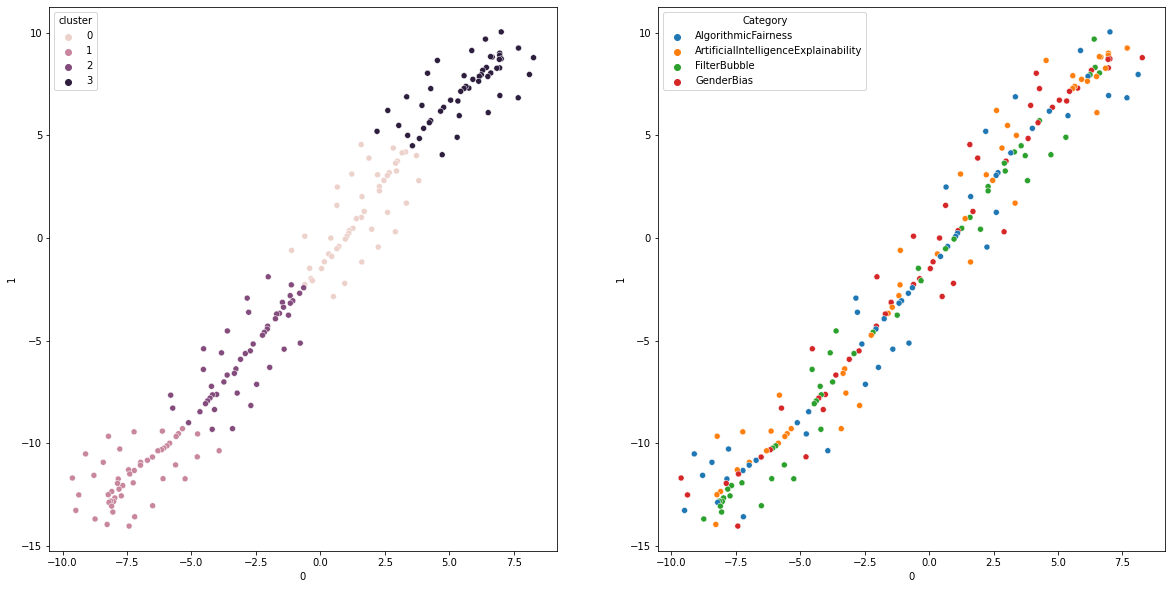

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# create figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# first subplot
sns.scatterplot(data=embedded_df, x=0, y=1, hue='cluster', ax=ax[0])

# second subplot
sns.scatterplot(data=embedded_df, x=0, y=1, hue='Category', ax=ax[1])

# show the figure
plt.show()

On the left we can see the documents colored by their cluster label(0-3), we can see that there is a trend in the data and we can divide the samples to clusters based on T-sne x, y values. Also  dividing them to 4 clusters makes sens. On the right we can see the documents colored by their category(Algorithmic fairness, Artificiall Intelligence explaiinability, filter bubble and gender bias), here we can see that there is a huge different between the predicted cluster and the category of the document, documents from different categories tend to spred across different clusters.

<H2>Evaluating the clustering results</h2>
We will evalute the clustering results using the following mesures.<br>
<ul>
  <li>
  Rand index - computes a similarity measure between two clusterings(here the documents categories and kmeans predicted clusters) by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
  </li>
  <li>
  Purity - How well we managed to reproduce the categories.
  </li>
  <li>
  MNI - How much information the clusters contain about the documents classification(labeled categories).
  </li>
</ul>


In [49]:
def evaluate_clusters_rand_index(labels_true, labels_pred):
  """
  Calculate the Rand index of the clustering
  @params: labels_true= the category vactor of the documents
  @params: labels_pred= the predicted cluster vector of the documents.
  @returns: the rand index.
  """
  return adjusted_rand_score(labels_true, labels_pred)

In [51]:
print("The rand index is {:.10f}".format(evaluate_clusters_rand_index(labels_true=embedded_df["Category"], labels_pred=embedded_df['cluster'])))

The rand index is 0.0000598598


In [44]:
def evaluate_clusters_purity(evalution_df):
  """
  Calculate the purity of the clustering
  @params: evalution_df = dataframe that contains the category vactor of the documents and the predicted cluster vector of the documents
  @returns: the purity.
  """
  purity_score = 0

  grouped_by_cluster = evalution_df.groupby("cluster")

  for cluster, df in grouped_by_cluster:
    dominant_class = df["Y-LABEL"].mode()[0]
    print("The mode category of cluster {} is {}".format(cluster,dominant_class))
    number_dominant_class = len(df[df["Y-LABEL"]==dominant_class])
    purity_score+= number_dominant_class

  return purity_score/(len(evalution_df))

In [46]:
print("The purity score is {}".format(evaluate_clusters_purity(evalution_df=check_df)))

The mode category of cluster 0 is GenderBias
The mode category of cluster 1 is FilterBubble
The mode category of cluster 2 is AlgorithmicFairness
The mode category of cluster 3 is ArtificialIntelligenceExplainability
The purity score is 0.315


In [53]:
def evaluate_clustering_nmi(labels_true, labels_pred):
  """
  Calculate the nmi(normalized mutual information) of the clustering
  @params: labels_true= the category vactor of the documents
  @params: labels_pred= the predicted cluster vector of the documents.
  @returns: the rand index.
  """
  return normalized_mutual_info_score(labels_true, labels_pred)

In [54]:
print("The mni score is is {:.10f}".format(evaluate_clustering_nmi(labels_true=embedded_df["Category"], labels_pred=embedded_df['cluster'])))

The mni score is is 0.0168529113


All the scores are very low as we expected. Yet in the purity score we can see that altought it is hard to see each category has a cluster where it is the dominant category. 